In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # data processing, excel file importation

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils

In [2]:
df = pd.read_excel('DataSet.xlsx')

In [3]:
df.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,0.376611
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,0.788738
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,0.375597
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,0.773472
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,0.278507


In [4]:
df.sample(5)

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
145278,10899635,NaN,NaN,NaN,6206.12,6206.12,2022-07-20,4.0,0.0,0.0,...,2021-10-04,NaN,200300.0,7840.833333,47045.0,6.0,10015.0,0.0,0.0,0.332754
16254,10870201,NaN,NaN,NaN,150.28,150.28,2021-03-29,1.0,0.0,0.0,...,2021-03-29,2022-01-31 12:04:59.8400000,108000.0,3966.666666,23800.0,6.0,5000.0,0.0,0.0,0.405681
120220,10768578,NaN,NaN,NaN,6373.56,6373.56,2021-03-28,12.0,0.0,0.0,...,2019-04-04,2022-04-06 13:01:30.4705000,152600.0,4876.666666,29260.0,6.0,5000.0,0.0,0.0,0.673938
120301,10822770,NaN,NaN,NaN,7233.78,6678.03,2022-03-31,11.0,0.0,700.0,...,2020-05-22,NaN,95800.0,4000.000000,24000.0,6.0,5000.0,2.0,0.0,0.632399
216016,10920047,NaN,NaN,NaN,1890.00,1890.00,2022-03-31,2.0,6000.0,1500.0,...,2022-01-27,NaN,141700.0,4361.666666,26170.0,6.0,5000.0,1.0,1.0,0.464148


In [5]:
df.columns

Index([                            'PolicyId',
                                   'ClaimId ',
                        'SumTotalClaimAmount',
                      'CountTotalClaimAmount',
                                 'PremiumSum',
                             'CasePremiumSum',
                             'PaymentDueDate',
                   'TotalPremiumPaymentCount',
                      'PreviousInsurerExcess',
                     'PreviousInsurerPremium',
                             'EmploymentType',
                              'IsMemberPayer',
                                   'Employer',
                                 'Occupation',
                               'IndustryType',
                                     'Gender',
                                    'BirthDt',
                              'MaritalStatus',
                                       'Make',
                                      'Model',
                                     'Colour',
             

In [6]:
df.shape

(262990, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [8]:
df.isna().sum()

PolicyId                                     0
ClaimId                                 235512
SumTotalClaimAmount                     235598
CountTotalClaimAmount                   235512
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                            2656
IsMemberPayer                                0
Employer                                255704
Occupation                                2246
IndustryType                              4131
Gender                                       8
BirthDt                                      6
MaritalStatus                                6
Make                                         6
Model                                        6
Colour                                       6
Transmission 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
df.corr()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,...,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
PolicyId,1.000000,0.674319,0.033234,-0.051384,-0.320445,-0.265335,-0.339870,-0.014394,-0.045854,-0.024764,...,-0.450538,-0.453100,0.065627,0.105844,0.396211,0.498567,0.134392,-0.187614,-0.106212,-0.000908
ClaimId,0.674319,1.000000,-0.005912,0.027355,-0.122185,-0.075426,-0.155565,-0.015826,-0.042123,-0.025404,...,-0.016954,-0.021405,0.038429,0.055201,0.413176,0.611641,0.093471,-0.082379,-0.066292,0.006330
SumTotalClaimAmount,0.033234,-0.005912,1.000000,0.257181,-0.152296,-0.165338,-0.269677,0.036814,0.046033,0.001859,...,-0.231691,-0.232308,0.126341,0.106573,-0.055318,-0.216238,0.089932,-0.044302,-0.006269,0.002106
CountTotalClaimAmount,-0.051384,0.027355,0.257181,1.000000,0.122545,0.122236,0.084695,0.012873,0.046366,0.006947,...,0.071021,0.072212,0.033874,0.031689,0.021151,0.000827,-0.051575,0.013327,0.022365,-0.007581
PremiumSum,-0.320445,-0.122185,-0.152296,0.122545,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,...,0.533948,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.001310
CasePremiumSum,-0.265335,-0.075426,-0.165338,0.122236,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,...,0.610786,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.002064
TotalPremiumPaymentCount,-0.339870,-0.155565,-0.269677,0.084695,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,...,0.675016,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,-0.001982
PreviousInsurerExcess,-0.014394,-0.015826,0.036814,0.012873,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,...,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,0.000920
PreviousInsurerPremium,-0.045854,-0.042123,0.046033,0.046366,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,...,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.001931
IsMemberPayer,-0.024764,-0.025404,0.001859,0.006947,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,...,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,0.000817


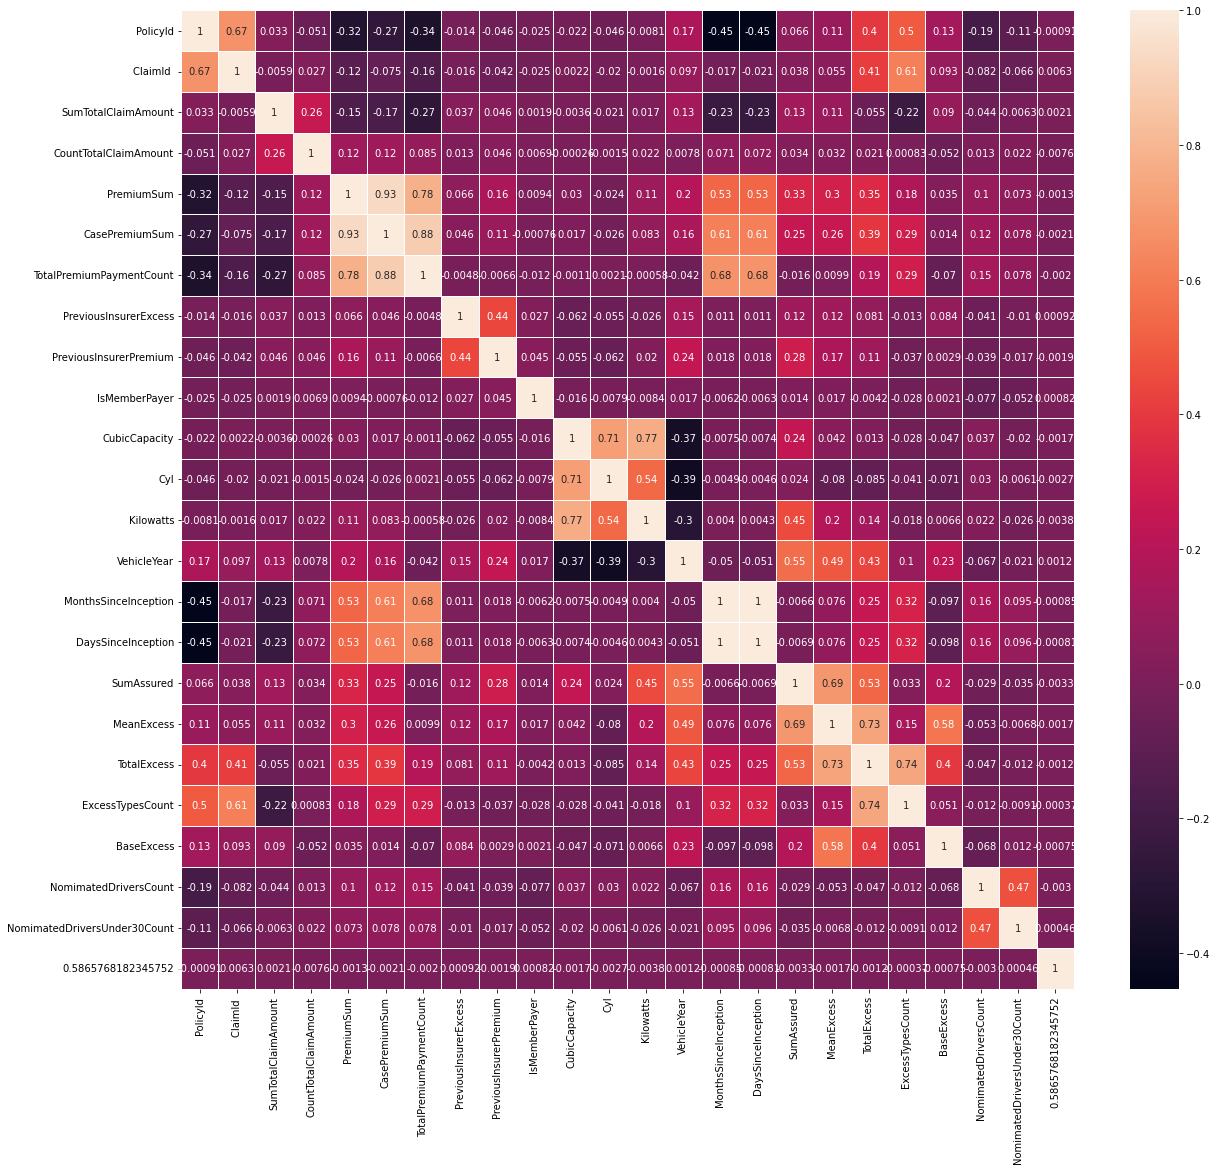

In [11]:
corr = df.corr();
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr, annot=True, ax=ax, linewidths=1, xticklabels=True, yticklabels=True);

<Figure size 1080x360 with 0 Axes>

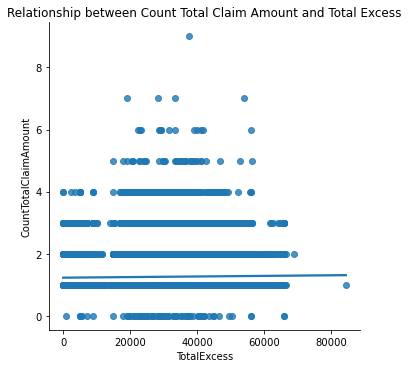

In [27]:
plt.figure(figsize=(15,5))
sns.lmplot(x="TotalExcess", y="CountTotalClaimAmount", data=df)
plt.title('Relationship between Count Total Claim Amount and Total Excess')
plt.show()